In [62]:
#taking the data set
import pandas as pd
import numpy as np
import matplotlib

dataset = pd.read_csv("Downloads/gowalla/gowalla_spots_subset1.csv")
#dataset.drop(['category'],axis=1)
print(len(dataset.index))
dataset.head()


2724891


,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories
0,8904,2008-12-06T16:28:53Z,-94.607499,39.052318,0,114,21,35,0,10,10,"[{'url': '/categories/89', 'name': 'Craftsman'}]"
1,8932,2008-12-13T02:16:51Z,-97.254356,32.927662,2,67,48,75,0,6,10,"[{'url': '/categories/17', 'name': 'BBQ'}]"
2,8936,2008-12-14T22:08:39Z,-94.591995,39.053318,0,75,46,75,0,10,10,"[{'url': '/categories/103', 'name': 'Theatre'}]"
3,8938,2008-12-15T00:22:49Z,-94.590311,39.052824,38,438,94,50,10,10,10,"[{'url': '/categories/1', 'name': 'Coffee Shop'}]"
4,8947,2008-12-16T23:14:05Z,-122.029631,37.331880,91,3100,1186,200,20,10,10,"[{'url': '/categories/121', 'name': 'Corporate..."


In [63]:
# pre processing of data
#Sensitivity -> The ℓ1 sensitivity of a function gives an upper bound on how much we must perturb its output to preserve privacyThe ℓ1 sensitivity of a function gives an upper bound on how much we must perturb its output to preserve privacy
sensitivity = 1
epsilon = 0.1 #measure of privacy loss
location =0


dataset['combinedLatLong'] = list(zip(dataset.lat, dataset.lng))
print(dataset['combinedLatLong'])

datacount = dataset["combinedLatLong"].value_counts()
formatted_lat  = pd.to_numeric(dataset['lat'] ,errors='coerce')
formatted_lon = pd.to_numeric(dataset['lng'] ,errors='coerce')

formatted_lat_array = dataset["lat"].to_numpy()
print(formatted_lat_array)
formatted_lon_array = dataset["lng"].to_numpy()
print(formatted_lon_array)

0           (39.052318309499995, -94.60749864579999)
1                    (32.9276616668, -97.2543561459)
2                (39.0533181067, -94.59199547770001)
3                      (39.0528237667, -94.59031105)
4               (37.3318803266, -122.02963113780001)
                             ...                    
2724886               (-19.937407049, -43.949700594)
2724887         (33.578372288000004, -101.843379736)
2724888    (47.738832726000005, -121.98508501100001)
2724889           (32.954144191, -97.06319969200001)
2724890                (35.449132919, -97.725467294)
Name: combinedLatLong, Length: 2724891, dtype: object
[39.05231831 32.92766167 39.05331811 ... 47.73883273 32.95414419
 35.44913292]
[ -94.60749865  -97.25435615  -94.59199548 ... -121.98508501  -97.06319969
  -97.72546729]


In [64]:
# calculate the noise scale we need to inject for laplace noise

noise_scale=sensitivity/epsilon #for this scale , data will be calibrated
print('Noise scale is',noise_scale)

# Gets random laplacian noise for all values
Laplacian_noise_lat = np.random.laplace(location,noise_scale,formatted_lat_array.shape)
Laplacian_noise_lon = np.random.laplace(location,noise_scale,formatted_lon_array.shape)
print('generated laplacian noise for lat is',Laplacian_noise_lat)
print('generated laplacian noise for lon is',Laplacian_noise_lon)
# Add random noise generated from Laplace function to actual data
noisydata_lat = formatted_lat + Laplacian_noise_lat
noisydata_lon = formatted_lon + Laplacian_noise_lon

dataset['combinedNoiseLatLong'] = list(zip(noisydata_lat, noisydata_lon))

print(dataset['combinedNoiseLatLong'])
noisydata_lat = noisydata_lat.to_numpy() #lat dataset to array will help to plot
print(noisydata_lat)
noisydata_lon = noisydata_lon.to_numpy() #lon dataset to array will help to plot
print(noisydata_lon)

Noise scale is 10.0
generated laplacian noise for lat is [-2.46772278 -1.55296763 -0.62624317 ...  9.47414679 -6.11218457
 45.76754083]
generated laplacian noise for lon is [ -2.15226467 -18.25598526  11.37540704 ...  -3.47109183   6.40927755
  -0.90107676]
0            (36.58459552659651, -96.75976331615163)
1          (31.374694038084083, -115.51034140518249)
2            (38.42707493504795, -83.21658843593151)
3             (33.95617770004392, -85.8775338510038)
4           (30.519980360241476, -130.9244261600195)
                             ...                    
2724886    (-43.151620461451635, -39.75947194887349)
2724887     (38.66407448861526, -101.16547716934595)
2724888     (57.21297951306283, -125.45617684378885)
2724889     (26.841959624277916, -90.65392214066001)
2724890       (81.2166737504329, -98.62654405541481)
Name: combinedNoiseLatLong, Length: 2724891, dtype: object
[36.58459553 31.37469404 38.42707494 ... 57.21297951 26.84195962
 81.21667375]
[ -96.75976332 -115.5

In [65]:
# calculate the gaussian noise scale we need to inject

delta = 10e-5
sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon 
print('sacled to',sigma)
# Gets random gaussian noise for all values
Gaussian_noise_lat = np.random.normal(location,sigma,formatted_lat_array.shape)
Gaussian_noise_lon = np.random.normal(location,sigma,formatted_lon_array.shape)
print('generated gaussian noise for lat is',Gaussian_noise_lat)
print('generated gaussian noise for lon is',Gaussian_noise_lon)
# Add random noise generated from gaussian function to actual data
Gnoisydata_lat = formatted_lat + Gaussian_noise_lat
Gnoisydata_lon = formatted_lon + Gaussian_noise_lon

dataset['combinedGNoiseLatLong'] = list(zip(Gnoisydata_lat, Gnoisydata_lon))
print(dataset['combinedGNoiseLatLong'] )

Gnoisydata_lat = Gnoisydata_lat.to_numpy() #lat dataset to array will help to plot
print(Gnoisydata_lat)
Gnoisydata_lon = Gnoisydata_lon.to_numpy() #lon dataset to array will help to plot
print(Gnoisydata_lon)


sacled to 43.4361230389877
generated gaussian noise for lat is [ 49.57578313  13.34562033  43.19497625 ... -38.22375479  -4.27378148
 -25.01917039]
generated gaussian noise for lon is [-71.51576627  -9.16023544  -8.34591308 ... -61.26004779 -26.13180667
  -8.77874592]
0            (88.62810144266346, -166.12326491814886)
1           (46.273282001040606, -106.41459158494904)
2            (82.24829435184708, -102.93790855652954)
3          (-0.7940281705166541, -116.70350473610975)
4            (37.58587494584562, -128.06256970871118)
                              ...                    
2724886     (-19.456858263211963, -64.84193393341172)
2724887      (11.191688063671005, -89.68007730745886)
2724888      (9.515077934659047, -183.24513280454755)
2724889     (28.680362714380326, -123.19500636342765)
2724890     (10.429962532521337, -106.50421321763288)
Name: combinedGNoiseLatLong, Length: 2724891, dtype: object
[88.62810144 46.273282   82.24829435 ...  9.51507793 28.68036271
 10.42996253

In [72]:
#Exponential_noise = np.random.exponential(1)     # Keep max limit = 1

# Gets random exponential noise for all values
Exponential_noise_lat = np.random.exponential(1)
Exponential_noise_lon = np.random.exponential(1)
print('generated exponential noise for lat is',Exponential_noise_lat)
print('generated exponential noise for lon is',Exponential_noise_lon)
# Add random noise generated from exponential function to actual data
Enoisydata_lat = formatted_lat + Exponential_noise_lat
Enoisydata_lon = formatted_lon + Exponential_noise_lon



dataset['combinedENoiseLatLong'] = list(zip(Enoisydata_lat, Enoisydata_lon))

print(dataset['combinedENoiseLatLong'] )

Enoisydata_lat= Enoisydata_lat.dropna()#to drop na
Enoisydata_lat= Enoisydata_lat.to_numpy()# pd to numpy array



Enoisydata_lon = Enoisydata_lon.dropna()
Enoisydata_lon = Enoisydata_lon.to_numpy()

 # print yoyo
noisylat_array= []
for i in Enoisydata_lat:
    i=i + Exponential_noise_lat
    noisylat_array.append(i)
    

 # print yoyo1
noisylon_array= []
for i in Enoisydata_lon:
    i=i + Exponential_noise_lon
    noisylon_array.append(i)
    


generated exponential noise for lat is 1.9607294062747234
generated exponential noise for lon is 0.10905428541877502
0            (41.01304771577472, -94.49844436038121)
1            (34.88839107307472, -97.14530186048123)
2            (41.01404751297472, -94.48294119228123)
3           (41.013553172974724, -94.48125676458122)
4           (39.29260973287472, -121.92057685238123)
                             ...                    
2724886    (-17.976677642725278, -43.84064630858123)
2724887     (35.53910169427473, -101.73432545058122)
2724888     (49.69956213227473, -121.87603072558123)
2724889      (34.91487359727472, -96.95414540658123)
2724890      (37.40986232527472, -97.61641300858122)
Name: combinedENoiseLatLong, Length: 2724891, dtype: object


In [67]:
#plotting for these 3
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

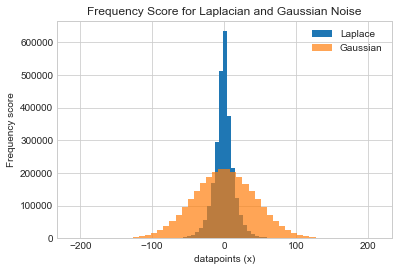

In [68]:
#plt.hist(Laplacian_noise_lat,label='Laplace')
#plt.hist(Gaussian_noise_lat,label='Gaussian');
#plt.legend();


plt.hist(Laplacian_noise_lat, bins=50,label='Laplace')
plt.hist(Gaussian_noise_lat, bins=50,alpha =.7, label='Gaussian');
plt.xlabel("datapoints (x)")
plt.ylabel("Frequency score")
plt.title("Probability Density Function of Laplace and Gaussian Noise")
plt.legend();
plt.title("Frequency Score for Laplacian and Gaussian Noise")
plt.show()

laplace noise [-2.46772278 -1.55296763 -0.62624317 ...  9.47414679 -6.11218457
 45.76754083]
gaussian noise [ 49.57578313  13.34562033  43.19497625 ... -38.22375479  -4.27378148
 -25.01917039]


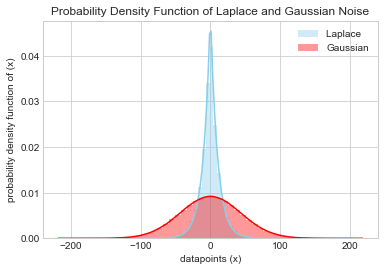

In [69]:
# Seaborn distplot lets you show a histogram with a line on it.

print("laplace noise",Laplacian_noise_lat) #https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/ ->reference
print("gaussian noise",Gaussian_noise_lat)
sns.distplot(Laplacian_noise_lat, color="skyblue",label='Laplace ')
sns.distplot(Gaussian_noise_lat, color="red", label='Gaussian')
plt.xlabel("datapoints (x)")
plt.ylabel("probability density function of (x)")
plt.title("Probability Density Function of Laplace and Gaussian Noise")
plt.legend()
plt.show()

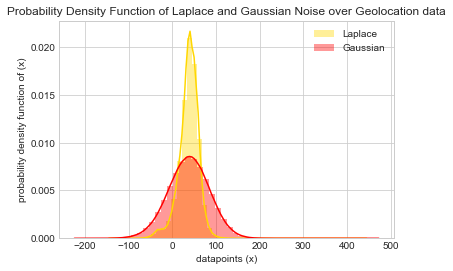

In [70]:
# print for the data of weeplace , not for noise

sns.distplot(noisydata_lat, color="gold",label="Laplace")
sns.distplot(Gnoisydata_lat, color="red", label="Gaussian")
plt.xlabel("datapoints (x)")
plt.ylabel("probability density function of (x)")
plt.title("Probability Density Function of Laplace and Gaussian Noise over Geolocation data")
plt.legend()
plt.show()

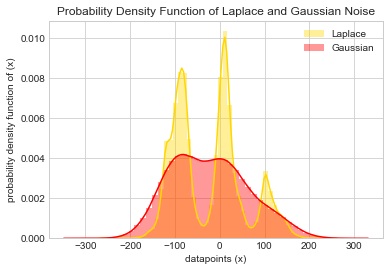

In [71]:
# print for the data of weeplace , not for noise

sns.distplot(noisydata_lon, color="gold",label="Laplace")
sns.distplot(Gnoisydata_lon, color="red", label="Gaussian")
#sns.distplot(Enoisydata_lon,color="olive",label="Exponential")
plt.xlabel("datapoints (x)")
plt.ylabel("probability density function of (x)")
plt.title("Probability Density Function of Laplace and Gaussian Noise")
plt.legend()
plt.show()